# Problem Statement:Download Data Set Available on kaggle (The last column of the dataset needs to be changed to 0 or 1)
DataSet : https://www.kaggle.com/mohansacharya/graduate-admissions
The counselor of the firm is supposed check whether the student will get an admission or not
based on his/her GRE score and Academic Score. So to help the counselor to take appropriate
decisions build a machine learning model classifier using SVM to predict whether a
student will get admission or not.

A.Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if
necessary.

B.Perform data-preparation (Train-Test Split)

C. Apply Machine Learning Algorithm

D. Evaluate Model.


## Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
A=pd.read_csv('C:\\Users\\desktop\\Downloads\\archive\\Admission_Predict.csv')

In [3]:
A

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
A.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#drop Serial No. column as it has no significance
A.drop('Serial No.',axis=1,inplace=True)

In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
A.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [8]:
A.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

<AxesSubplot:>

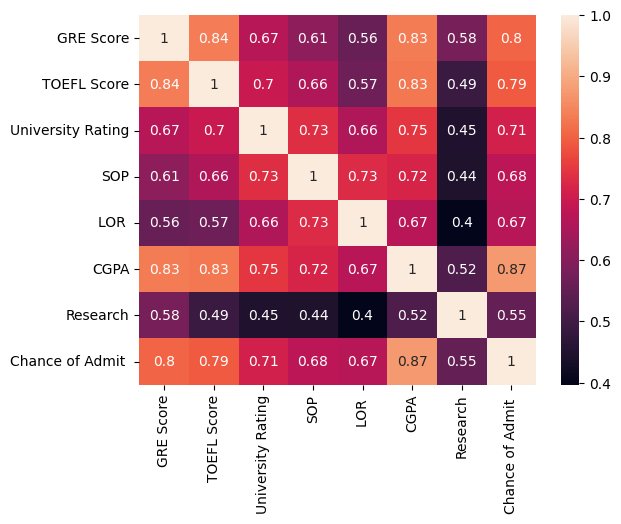

In [9]:
A_corr = A.corr()
sns.heatmap(A_corr,annot=True)

In [10]:
#convert chance of admit column into binary values
A['Chance of Admit ']= A['Chance of Admit '].apply(lambda x:1 if x >= 0.50 else 0)


In [11]:
A

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,1
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,1
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,1


## Splitting the Dataset

In [12]:
x=A.drop('Chance of Admit ',axis=1)
y=A['Chance of Admit ']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Chance of Admit , dtype: int64

In [15]:
print("shape of xtrain:",xtrain.shape)
print("shape of xtest:",xtest.shape)
print("shape of ytrain:",ytrain.shape)
print("shape of ytest:",ytest.shape)

shape of xtrain: (320, 7)
shape of xtest: (80, 7)
shape of ytrain: (320,)
shape of ytest: (80,)


## Linear Kernel

In [16]:
classifier1= SVC(kernel='linear',random_state=0)
classifier1.fit(xtrain,ytrain)
y1_pred = classifier1.predict(xtest)

## Polynomial Kernel

In [17]:
classifier2 = SVC(kernel='poly')
classifier2.fit(xtrain, ytrain)
y2_pred = classifier2.predict(xtest)

## rbf Kernel

In [18]:
classifier3 = SVC(kernel='rbf')
classifier3.fit(xtrain, ytrain)
y3_pred = classifier3.predict(xtest)

## Sigmoid Kernel

In [19]:
classifier4 = SVC(kernel='sigmoid')
classifier4.fit(xtrain, ytrain)
y4_pred = classifier4.predict(xtest)

## Evaluation

In [20]:
final_ouput_diff = pd.DataFrame({'Acutal': ytest, 'Linear Kernel': y1_pred, 'Polynomial kernel': y2_pred, 'rbf kernel': y3_pred, 'sigmoid kernel': y4_pred})

In [21]:
final_ouput_diff.head(50)

,Acutal,Linear Kernel,Polynomial kernel,rbf kernel,sigmoid kernel
209,1,1,1,1,1
280,1,1,1,1,1
33,1,1,1,1,1
210,1,1,1,1,1
93,0,1,1,1,1
84,1,1,1,1,1
329,0,0,1,1,1
94,0,0,1,1,1
266,1,1,1,1,1
126,1,1,1,1,1


In [22]:
# from above result we can see that out dataset is linear hence Linear kernel is best for this dataset

In [23]:
# compartring accurency scores 
accuracy_score_df = pd.DataFrame({'Linear Kernel': accuracy_score(ytest, y1_pred), 'Polynomial kernel': accuracy_score(ytest, y2_pred), 'rbf kernel': accuracy_score(ytest, y3_pred), 'sigmoid kernel': accuracy_score(ytest, y4_pred)}, index=[0])

In [24]:
accuracy_score_df

,Linear Kernel,Polynomial kernel,rbf kernel,sigmoid kernel
0,0.9375,0.875,0.875,0.875


## Visualising Linear Model

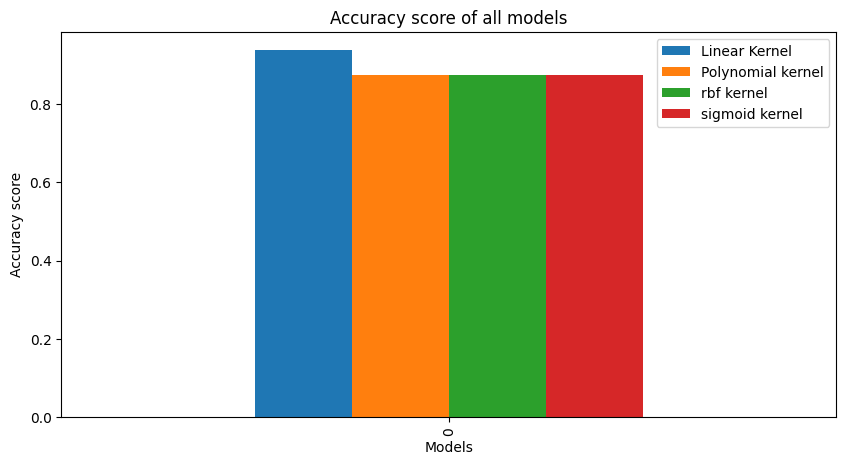

In [25]:
# plot accuracy score of all models
accuracy_score_df.plot(kind='bar', figsize=(10, 5))
plt.title('Accuracy score of all models')
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.show()


<AxesSubplot:>

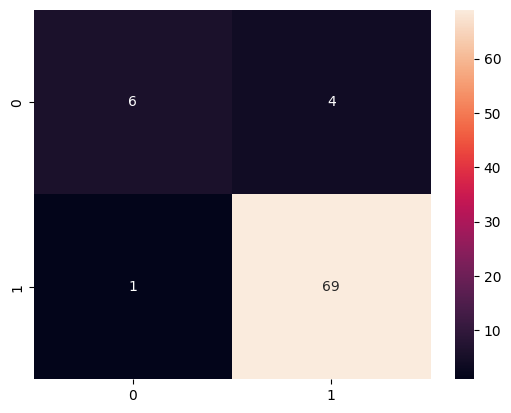

In [26]:
# visualising linear kernel

cm = confusion_matrix(ytest, y1_pred)
sns.heatmap(cm, annot=True)